Librerías

C:\Users\alo9j\AppData\Local\Temp\ipykernel_3332\3547542263.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(300,700))
C:\Users\alo9j\AppData\Local\Temp\ipykernel_3332\3547542263.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(100,300))
C:\Users\alo9j\AppData\Local\Temp\ipykernel_3332\3547542263.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


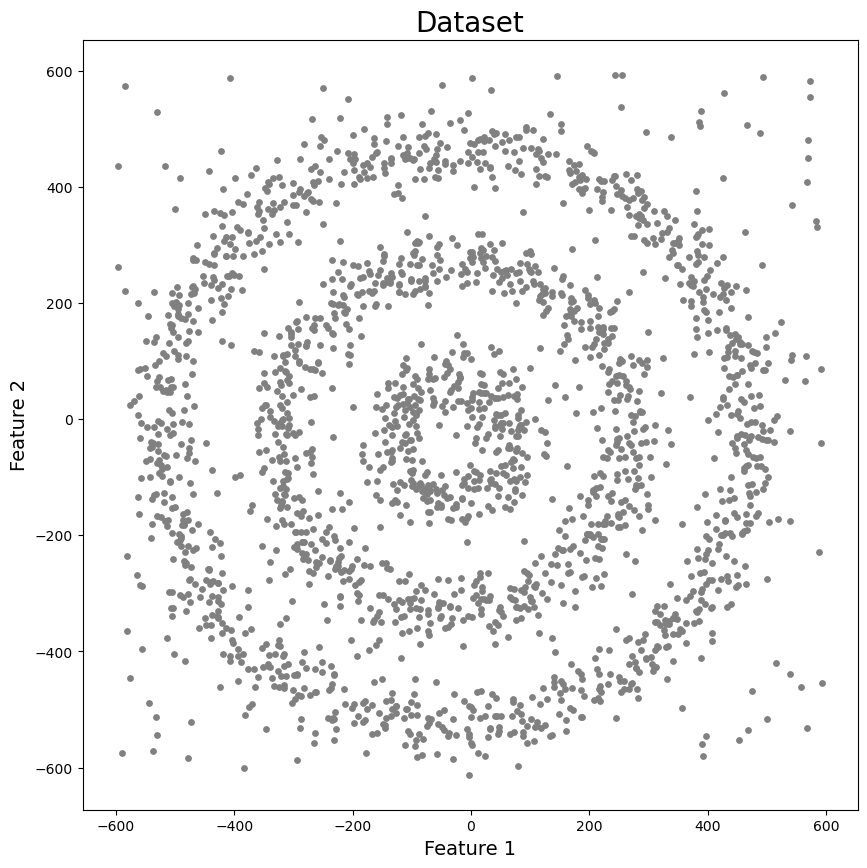

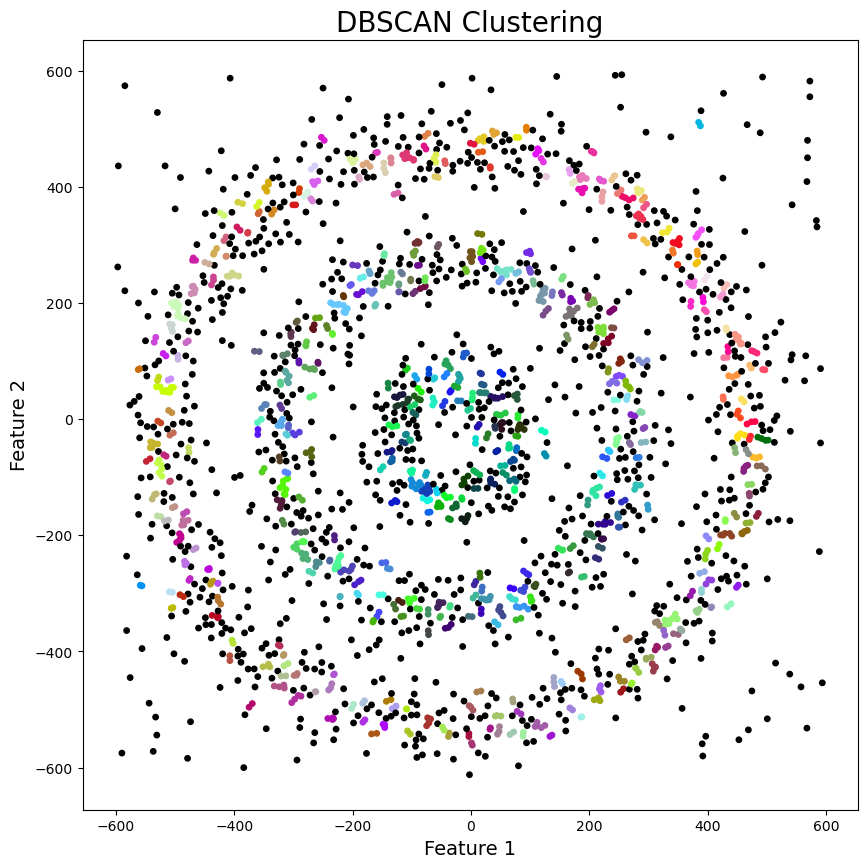

In [3]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Funciones

In [ ]:

np.random.seed(42)


# Function for creating datapoints in the form of a circle
def PointsInCircum(r, n=100):
    return [(math.cos(2*math.pi/n*x)*r +
             np.random.normal(-30, 30),
             math.sin(2*math.pi/n*x)*r +
             np.random.normal(-30, 30)) for x in range(1, n+1)]


# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

dbscan_opt=DBSCAN(eps=9, min_samples=2)
dbscan_opt.fit(df[[0,1]])
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()



In [ ]:
# Plotting the resulting clusters
# Extend the list colors to include all of the colors in the RGB color space
colors = [(r, g, b) for r in range(256) for g in range(256) for b in range(256)]
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()